## Numerical solution to anharmonic oscillator in fixed number of bases (Perturbation theory)
Ref: 
- https://young.physics.ucsc.edu/115/matrix_qm.pdf  
- Physics by computer - Kinzel, Reents p. 47 - 51  

To find the solutions to eigen value equation of a finite matrix for an anharmonic oscillator (For any number of finite basis states and parameter $\lambda$) 

### Theory:
The Hamiltonian of a harmonic oscilaltor is given by $H_0 = \frac{1}{2} (p^2+x^2)$  
- Energies are measured in units of $\hbar \omega$, 
- Momenta in units of $\sqrt{\hbar m \omega}$,
- Lengths in units of $\sqrt{\hbar /(m \omega)}$

The eigenstates of $H_0$ are given by $\phi_j(x) = (2^j j! \sqrt{\pi})^{-\frac{1}{2}}e^{-x^2/2} H_j(x)$  
where $H_j(x)$ are Hermite polynomials  
Hence, $H_0|j> = E_j^0|j>$ where $E_j^0 = j + \frac{1}{2} for j = 0,1,2,...$  

Consider the **Anharmonic potential** $H = H_0 + \lambda x^4$  
Representing the position operator in the space of unperturbed states give $<i|x|j> = \frac{1}{2} \sqrt{i+j+1} \delta_{|i-j|,1}$. this expression will be used to obtain the matrix representation of the $x$ operator, again in the space of unperturbed energy eigenstates  

Hence, steps to be followed are  
- Find the $H_0$ matrix for bases of dimension n
- Find the $x$ matrix for bases of dimension n
- Compute the final hamiltonian matrix $h$ with parameter $\lambda$
- For a value of $\lambda$, find the eigenvalues of the $h$ matrix
- The sorted eigenvalues give the energy values of first n non-degenerate energy eigenstates (including ground state) 

In [1]:
# Loading required packages
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
l = sp.symbols('lamda')

- **H_Harmonic()** function returns a symbolic diagonal matrix with the energy eigenvales $n+\frac{1}{2}, n \in 1,2,3,...$ along its diagonal
- **x_Harmonic()** function returns a symbolic matrix representation of operator **x** in the basis of unperturbed energy eigenstates of the harmonic oscillator. $x\_H = <i|x|j>, i,j \in |n>$

In [2]:
def H_Harmonic(n):
    return(sp.Matrix(n,n,lambda i,j: (i)+sp.Rational(1/2) if i==j else 0))

def x_Harmonic(n):
    return(sp.Matrix(n,n, lambda i,j: sp.sqrt(i+j+1)/2 if abs(i-j) == 1 else 0))

### Finding the first 4 energy eigenstates for different values of parameter $\lambda$ for a basis of dimension 4

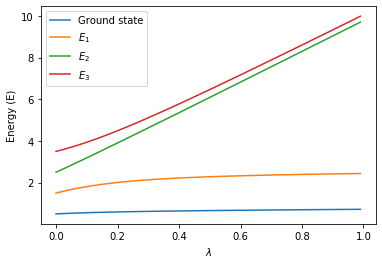

In [3]:
e0,e1,e2,e3 = [],[],[],[] # Energy levels for diff. lambda values
l_vals = np.arange(0,1,0.01) # Range of lambda values

h = H_Harmonic(4)+l*x_Harmonic(4)**4 # Hamiltonian of anharmonic oscillator
for la in l_vals:
    e = sorted(h.subs(l,la).eigenvals().keys()) #Sorted assumed to work for non-degenerate states
    e0.append(e[0])
    e1.append(e[1])
    e2.append(e[2])
    e3.append(e[3])
    
plt.plot(l_vals,e0, label = "Ground state")
plt.plot(l_vals,e1, label = "$E_1$")
plt.plot(l_vals,e2, label = "$E_2$")
plt.plot(l_vals,e3, label = "$E_3$")
plt.xlabel("$\lambda$")
plt.ylabel("Energy (E)")
plt.legend()
plt.show()

### Finding the convergence of the value of ground state energy for increasing dimension of basis states $n$ for a fixed $\lambda = 0.1$

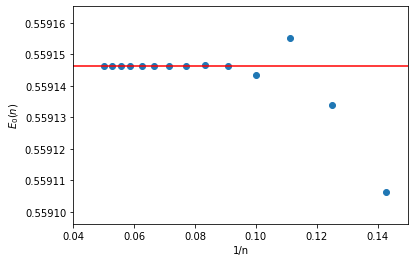

In [4]:
e0_n = [] # Ground state energy for different n
nH = np.arange(7,21,1) # Range of number of basis states used
for n in nH:
    h = H_Harmonic(int(n))+l*x_Harmonic(int(n))**4
    # Sympy eigenvals() returns errors. Hence converted to np array
    evals, evect = np.linalg.eig(np.array(h.subs(l,0.1).evalf(), dtype = float))
    e0_n.append(sorted(evals)[0])

# To find the ground state value it converged to, we consider n = 40
h = H_Harmonic(40)+l*x_Harmonic(40)**4
evals, evect = np.linalg.eig(np.array(h.subs(l,0.1).evalf(), dtype = float))
line = sorted(evals)[0]

plt.scatter((1/nH),e0_n)
plt.plot([0,1],[line,line],'r')
plt.xlim(0.04,0.15)
plt.ylim(min(e0_n)-0.00001,max(e0_n)+0.00001)
plt.xlabel("1/n")
plt.ylabel("$E_0 (n)$")
plt.show()

### Increasing the dimension of basis states to compute the first 5 energy levels for different values of $\lambda$
Here, we see that $E_3$ and $E_4$ are as expected as opposed to $E_3$ and $E_2$ computed with just 4 basis states in the first plot

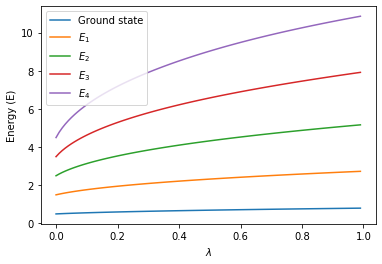

In [5]:
e0,e1,e2,e3,e4 = [],[],[],[],[] # Energy levels for diff. lambda values
l_vals = np.arange(0,1,0.01) # Range of lambda values
h = H_Harmonic(20)+l*x_Harmonic(20)**4
for la in l_vals:
    evals, evect = np.linalg.eig(np.array(h.subs(l,la).evalf(), dtype = float))
    evals.sort()
    e0.append(evals[0])
    e1.append(evals[1])
    e2.append(evals[2])
    e3.append(evals[3])
    e4.append(evals[4])

plt.plot(l_vals,e0, label = "Ground state")
plt.plot(l_vals,e1, label = "$E_1$")
plt.plot(l_vals,e2, label = "$E_2$")
plt.plot(l_vals,e3, label = "$E_3$")
plt.plot(l_vals,e4, label = "$E_4$")
plt.xlabel("$\lambda$")
plt.ylabel("Energy (E)")
plt.legend()
plt.show()